# Test di Pearson - Dati sub-orari

In [1]:
import os
import math
from pandas import *
import pandas as pd
from datetime import datetime
%matplotlib inline 
import matplotlib.pyplot as plt
from statsmodels.distributions.empirical_distribution import ECDF
from scipy.stats import norm
from scipy.stats import genextreme,gumbel_r
from numpy import linspace
from pylab import plot,show,hist,figure,title
from my_functions import*
os.getcwd()

'C:\\Users\\Tom\\1A_Idrologia\\dati\\xz. Esercitazione1'

In [2]:
data=leggi_sub('MORI_massimi di precipitazione.xls')
data

,15 min,30 min,45 min,1 ora
anno,,,,
1919.0,NaN,NaN,NaN,NaN
1920.0,NaN,NaN,NaN,NaN
1921.0,NaN,NaN,NaN,NaN
1922.0,NaN,NaN,NaN,NaN
1923.0,NaN,NaN,NaN,NaN
...,...,...,...,...
2006.0,15.8,25.6,28.6,29.2
2007.0,17.4,27.2,28.2,28.2
2008.0,NaN,NaN,NaN,NaN


In [3]:
ab_m=pd.read_pickle("abs_m")
ab_mq=pd.read_pickle("abs_mq")
ab_ml=pd.read_pickle("abs_ml")

In [4]:
a=[]
for h in data.columns:
    a=a+[[X2(data,ab_m,h,0.2),X2(data,ab_mq,h,0.2),X2(data,ab_ml,h,0.2)]]

pd.DataFrame(a,index=['            15 min','            30 min','            45 min','            1 ora'],columns=["M","MQ","ML"])

,M,MQ,ML
15 min,4.368421,7.526316,9.894737
30 min,2.263158,0.947368,1.210526
45 min,2.285714,0.857143,1.714286
1 ora,1.555556,1.333333,2.888889


In [5]:
best=DataFrame([ab_m["            15 min"],
                ab_mq["            30 min"],
                ab_mq["            45 min"],
                ab_mq["            1 ora"]]).T
                  
best

,15 min,30 min,45 min,1 ora
a,11.843503,15.492341,17.581733,19.345627
b,3.298360,4.588751,5.392597,5.101285


In [6]:
best.to_pickle("best_param")

In [7]:
def gumbel(x,abs_d,col):
    return np.exp(-np.exp(-(x-abs_d[col]["a"])/abs_d[col]["b"]))
t_rain=np.linspace(data.min()[0],data.max()[3],100)

In [8]:
gb=pd.DataFrame([gumbel(t_rain,best,"            15 min"),
                 gumbel(t_rain,best,"            30 min"),
                 gumbel(t_rain,best,"            45 min"),
                 gumbel(t_rain,best,"            1 ora")]).T
gb.index=t_rain
gb.columns=["            15 min","            30 min","            45 min","            1 ora"]
gb[-5:]

,15 min,30 min,45 min,1 ora
3.800000,0.000011,0.000003,0.000003,7.138180e-10
4.189899,0.000038,0.000008,0.000006,3.362125e-09
4.579798,0.000118,0.000021,0.000014,1.412917e-08
4.969697,0.000323,0.000050,0.000031,5.342440e-08
5.359596,0.000792,0.000112,0.000065,1.831720e-07
...,...,...,...,...
40.840404,0.999848,0.996018,0.986697,9.853159e-01
41.230303,0.999865,0.996342,0.987619,9.863890e-01
41.620202,0.999880,0.996639,0.988478,9.873842e-01
42.010101,0.999893,0.996913,0.989277,9.883071e-01


([<matplotlib.lines.Line2D at 0x1ae748a4e08>],
 [<matplotlib.lines.Line2D at 0x1ae74c11dc8>])

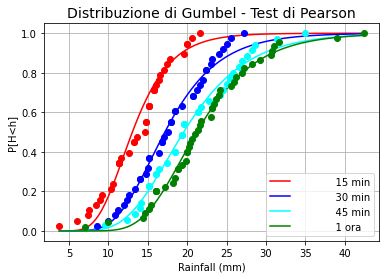

In [9]:
plot_pearson_sub(data, gb)